Here, I will camapare the performance of VGG16 and RESNET50 results which include inference time, number of parameters and image classifcation score.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50, VGG16

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path='/content/drive/My Drive/alligator vs crocodile/alligator/alligator3.jpg'
original_img=cv2.imread(path)
bgr_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

In [ ]:
print(bgr_img.shape)

(100, 100, 3)


In [ ]:
def process(img, model_name='resnet'):
  img = cv2.resize(img, (224,224))
  img = np.expand_dims(img, axis=0)
  if model_name == 'resnet':
    img = tf.keras.applications.resnet50.preprocess_input(img)
  elif model_name == 'vgg':
    img = tf.keras.applications.vgg16.preprocess_input(img)
  return img


In [ ]:
img = process(bgr_img, model_name='resnet')

In [ ]:
print(img)

[[[[ -6.939003  65.221     54.32    ]
   [ -6.939003  65.221     54.32    ]
   [ -5.939003  66.221     55.32    ]
   ...
   [-50.939003  47.221     12.32    ]
   [-50.939003  47.221     12.32    ]
   [-50.939003  47.221     12.32    ]]

  [[ -6.939003  65.221     54.32    ]
   [ -5.939003  66.221     55.32    ]
   [ -5.939003  67.221     56.32    ]
   ...
   [-49.939003  48.221     13.32    ]
   [-49.939003  48.221     13.32    ]
   [-49.939003  48.221     13.32    ]]

  [[ -4.939003  67.221     56.32    ]
   [ -4.939003  67.221     56.32    ]
   [ -4.939003  68.221     57.32    ]
   ...
   [-47.939003  50.221     15.32    ]
   [-47.939003  50.221     15.32    ]
   [-47.939003  50.221     15.32    ]]

  ...

  [[ 58.060997  53.221     53.32    ]
   [ 59.060997  54.221     54.32    ]
   [ 60.060997  55.221     55.32    ]
   ...
   [ 54.060997  48.221     50.32    ]
   [ 54.060997  48.221     50.32    ]
   [ 54.060997  48.221     50.32    ]]

  [[ 59.060997  54.221     54.32    ]
   [ 59

In [ ]:
import time

# RESNET50

In [ ]:
resnet_model=ResNet50()
print(resnet_model.summary())
#to see the layers, output shape of each layer,and paramters of each layer

In [ ]:
print(resnet_model.count_params())
# To see the number of paramters

In [ ]:
start=time.time()
r_raw_result=resnet_model(img)
r_inference_time=time.time()-start
print(r_inference_time)


0.49483680725097656


In [ ]:
result1=tf.keras.applications.resnet.decode_predictions(
    r_raw_result, top=5
)

In [ ]:
print(result1)

[[('n01698640', 'American_alligator', np.float32(0.9614812)), ('n01697457', 'African_crocodile', np.float32(0.038396582)), ('n01695060', 'Komodo_dragon', np.float32(2.3748857e-05)), ('n01688243', 'frilled_lizard', np.float32(1.8280181e-05)), ('n01630670', 'common_newt', np.float32(1.1277215e-05))]]


In [ ]:
resnet_result=result1[0][0][1]
print(resnet_result)

American_alligator


In [ ]:
r_prediction_score=result1[0][0][2]*100
print(r_prediction_score)

96.148125


In [ ]:
img=np.squeeze(img)

# to remove the batch dimension

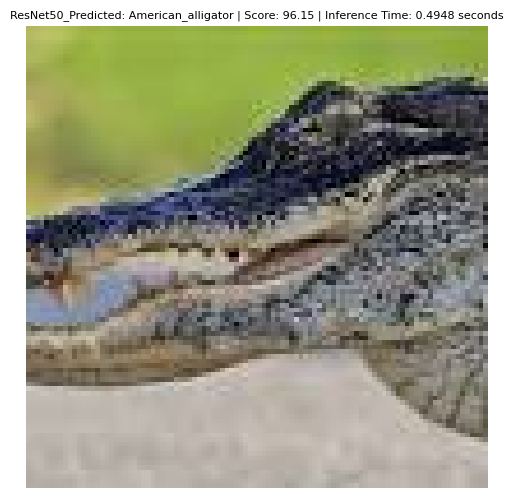

In [ ]:
plt.figure(figsize=(6,6))
plt.title(f"ResNet50_Predicted: {resnet_result} | Score: {r_prediction_score:.2f} | Inference Time: {r_inference_time:.4f} seconds", fontsize=8)
plt.imshow(bgr_img)
plt.axis('off')
plt.show()

# **VGG16**

In [ ]:
vgg_model=VGG16()

In [ ]:
print(vgg_model.count_params())

138357544


In [ ]:
print(vgg_model.summary())

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
img = process(bgr_img, model_name='vgg')

In [ ]:
vgg_start=time.time()
pred=vgg_model(img)
vgg_inference_time=time.time()-vgg_start
print(vgg_inference_time)

0.5745968818664551


In [ ]:
print(pred)

tf.Tensor(
[[1.12747021e-08 1.45465622e-08 5.47069112e-10 3.41307338e-09
  3.08114312e-10 1.21746467e-07 5.20611501e-08 1.67247549e-09
  9.95613547e-09 1.13012327e-07 1.54142555e-07 4.10886269e-10
  7.18612114e-11 1.32659739e-09 2.27820740e-09 2.53355843e-08
  1.67588499e-10 2.29818298e-09 3.28333971e-10 1.95008920e-09
  9.42265217e-08 1.34111144e-09 4.70789052e-09 1.13709941e-09
  1.30594886e-08 3.50865957e-06 3.92733258e-04 1.10289066e-05
  4.55776444e-07 5.19783327e-07 4.36278060e-06 1.92485331e-07
  1.00355392e-05 1.06025823e-07 1.54608006e-06 5.31338856e-07
  4.07828020e-06 3.33355210e-09 3.70502130e-06 5.72839042e-07
  6.80121161e-07 2.99412909e-06 2.43191926e-06 5.08240828e-06
  6.43354942e-05 2.53398269e-07 3.18065219e-07 4.11816836e-06
  1.69649502e-05 4.64948304e-02 9.52894032e-01 8.91246330e-08
  1.93525864e-07 2.48332306e-08 2.13404728e-05 1.43899550e-08
  5.80157167e-09 8.10586755e-07 1.07113851e-06 5.80159212e-06
  3.04880086e-06 2.28967522e-07 8.69854648e-06 1.34476309e-

In [ ]:
raw_result=tf.keras.applications.vgg16.decode_predictions(
    pred, top=5
)
print(raw_result)

[[('n01698640', 'American_alligator', np.float32(0.95289403)), ('n01697457', 'African_crocodile', np.float32(0.04649483)), ('n01630670', 'common_newt', np.float32(0.00039273326)), ('n01689811', 'alligator_lizard', np.float32(6.4335494e-05)), ('n01729322', 'hognose_snake', np.float32(2.1340473e-05))]]


In [ ]:
vgg_result=raw_result[0][0][1]
print(vgg_result)

American_alligator


In [ ]:
v_prediction_score=raw_result[0][0][2]*100
print(v_prediction_score)

95.289406


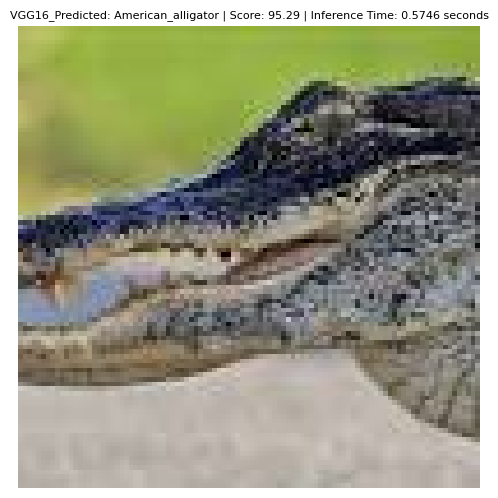

In [ ]:
plt.figure(figsize=(6,6))
plt.title(f"VGG16_Predicted: {vgg_result} | Score: {v_prediction_score:.2f} | Inference Time: {vgg_inference_time:.4f} seconds", fontsize=8)
plt.imshow(bgr_img)
plt.axis('off')
plt.show()